In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Display the first 5 rows and describe the dataset
df_wine = pd.DataFrame(X, columns=wine.feature_names)
df_wine['target'] = y
print(df_wine.head())
print(df_wine.describe())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


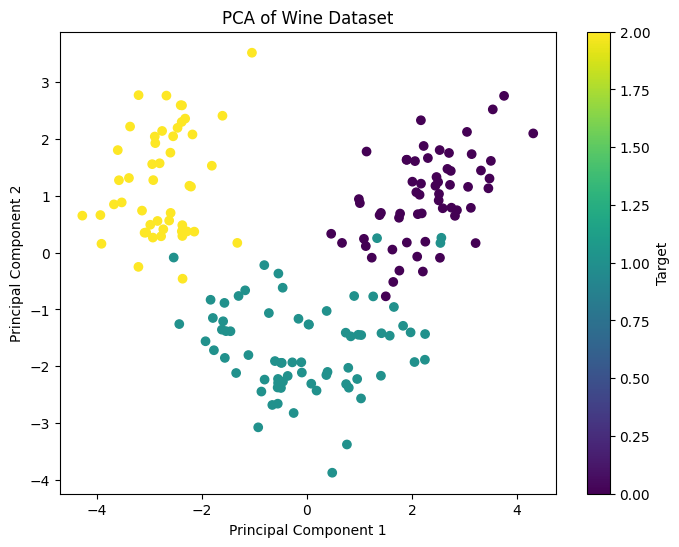

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Target')
plt.show()


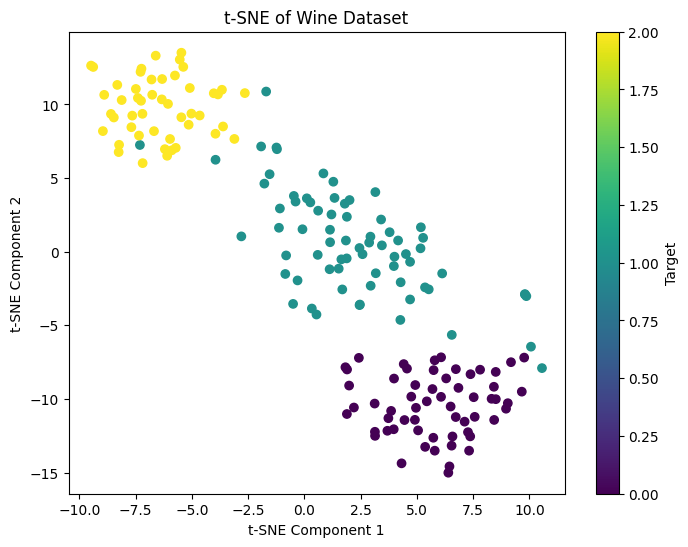

In [4]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_standardized)

# Visualize t-SNE result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE of Wine Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Target')
plt.show()


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means on PCA reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca)

# K-Means on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
original_labels = kmeans_original.fit_predict(X)

# Calculate silhouette scores
silhouette_pca = silhouette_score(X_pca, pca_labels)
silhouette_original = silhouette_score(X, original_labels)

print(f'Silhouette Score for PCA reduced data: {silhouette_pca:.2f}')
print(f'Silhouette Score for original data: {silhouette_original:.2f}')


Silhouette Score for PCA reduced data: 0.56
Silhouette Score for original data: 0.56
